In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
# Suppress FutureWarnings and UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*n_init.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*memory leak.*")

In [3]:
# Load datasets
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")


In [4]:
# Display basic information
print("Basic information in Customers.csv:\n",customers.info())
print("\nBasic information in Transactions.csv:\n",transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Basic information in Customers.csv:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
mem

In [5]:
# Step 1: Data Preprocessing
# Merge customer data with transaction data
merged_data = transactions.merge(customers, on="CustomerID")
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
...,...,...,...,...,...,...,...,...,...,...
995,T00774,C0095,P056,2024-01-07 14:19:49,2,32.16,16.08,William Walker,South America,2023-03-04
996,T00823,C0095,P079,2024-09-30 10:45:06,3,1252.11,417.37,William Walker,South America,2023-03-04
997,T00369,C0151,P082,2024-12-24 11:40:24,4,223.96,55.99,Amber Gonzalez,South America,2024-11-22
998,T00809,C0078,P075,2024-12-09 11:44:44,2,995.52,497.76,Julia Palmer,Asia,2024-11-13


In [6]:
# Extract relevant features
customer_features = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum'),
    num_transactions=('TransactionID', 'count'),
).reset_index()
customer_features

,CustomerID,total_spent,total_quantity,num_transactions
0,C0001,3354.52,12,5
1,C0002,1862.74,10,4
2,C0003,2725.38,14,4
3,C0004,5354.88,23,8
4,C0005,2034.24,7,3
...,...,...,...,...
194,C0196,4982.88,12,4
195,C0197,1928.65,9,3
196,C0198,931.83,3,2
197,C0199,1979.28,9,4


In [7]:
# Standardize the features
features = customer_features[['total_spent', 'total_quantity', 'num_transactions']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-0.06170143, -0.12203296, -0.01145819],
       [-0.87774353, -0.44800021, -0.46749414],
       [-0.40585722,  0.20393428, -0.46749414],
       [ 1.03254704,  1.67078689,  1.35664965],
       [-0.78392861, -0.93695108, -0.92353008],
       [ 0.41587942, -0.12203296, -0.46749414],
       [-0.48548229, -0.77396745, -0.92353008],
       [ 0.43997044,  1.18183602,  2.26872154],
       [-1.40630171, -1.58888557, -0.92353008],
       [-0.9571662 , -0.12203296, -0.46749414],
       [ 0.14369581,  0.04095066, -0.01145819],
       [ 0.96492372,  1.0188524 ,  0.9006137 ],
       [ 1.38575064,  0.85586877,  0.9006137 ],
       [-1.72239508, -1.75186919, -1.83560198],
       [-1.26353893, -1.42590195, -1.37956603],
       [ 0.22269727, -0.44800021, -0.01145819],
       [ 0.70375173,  1.34481964,  1.35664965],
       [ 0.71908486,  0.85586877, -0.01145819],
       [-0.70101045, -0.28501659,  0.44457776],
       [-1.39212827, -1.58888557, -1.83560198],
       [ 1.0681256 ,  0.69288515,  1.356

In [8]:
# Step 2: Clustering with K-Means
# Let's try clustering with different number of clusters (2 to 10)
db_scores = []
sil_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    customer_features['cluster'] = kmeans.fit_predict(features_scaled)
    
    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(features_scaled, customer_features['cluster'])
    db_scores.append(db_index)


In [9]:
# Step 3: Select the best number of clusters based on DB Index
best_k = cluster_range[db_scores.index(min(db_scores))]  # Min DB Index = better clustering
best_k

2

In [10]:
# Perform clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(features_scaled)


In [11]:
# Step 4: Calculate Davies-Bouldin Index for final clusters
final_db_index = davies_bouldin_score(features_scaled, customer_features['cluster'])
final_db_index

0.7233652695141876

In [12]:
# Step 5: Visualize the clusters
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

In [13]:
# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = customer_features['cluster']

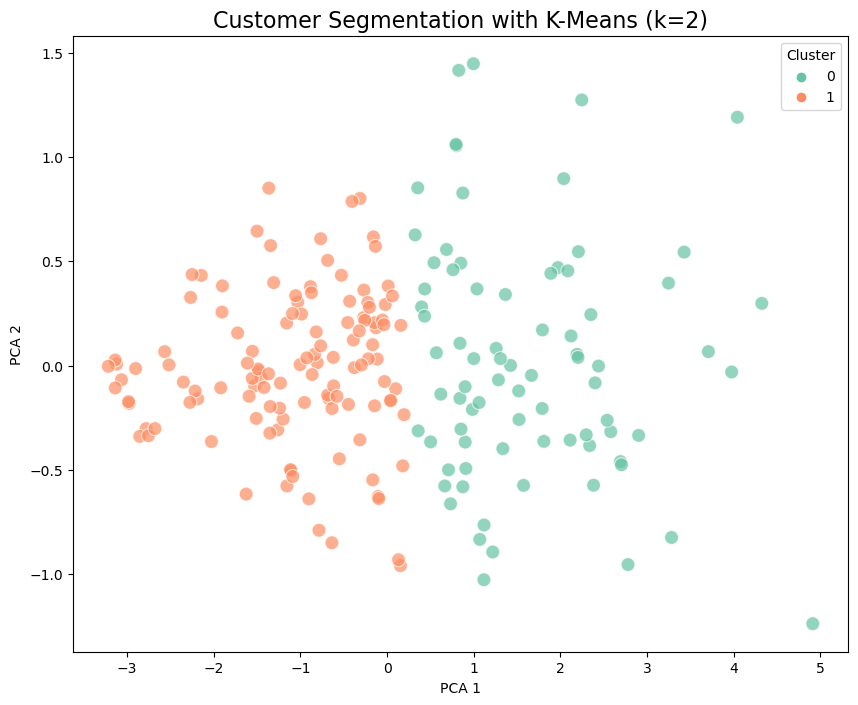

In [14]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=pca_df, s=100, alpha=0.7)
plt.title(f'Customer Segmentation with K-Means (k={best_k})', fontsize=16)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title="Cluster", loc='upper right')
plt.show()

In [15]:
# Step 6: Report the Results
print(f'Optimal number of clusters (k): {best_k}')
print(f'Davies-Bouldin Index for optimal clustering: {final_db_index:.4f}')

Optimal number of clusters (k): 2
Davies-Bouldin Index for optimal clustering: 0.7234
